In [14]:
import numpy as np
import pandas as pd
import torch
import random
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
import time
%matplotlib inline

In [15]:
# device = 'cuda' if torch.cuda.is_available() else 'cpu'
# print('GPU state:', device)

# torch.cuda.set_device(0)

# Parameter

In [16]:
num_point = 80

# Generate Samples

In [17]:
X = np.linspace(0, 1, num_point) 
noise = np.random.normal(0, 1, num_point)
y = 2 * X + noise

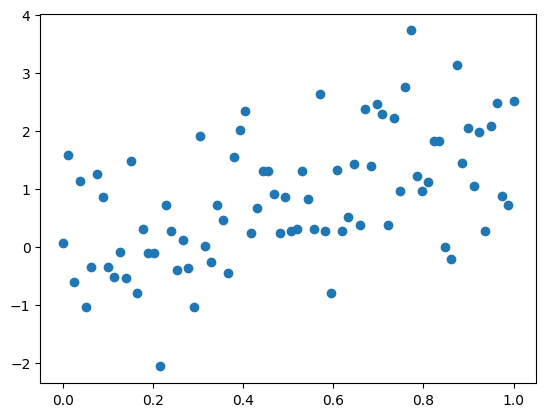

In [18]:
plt.scatter(X, y)

# Regression

In [19]:
def build_poly(x, degree):
    poly = np.array([]).reshape(len(x), -1)
    for deg in range(degree+1, 1, -1):
        poly = np.c_[poly, np.power(x, deg)]
    poly = np.c_[poly, np.ones((len(x), 1))]
    return poly

def mse(y, x_mat, w):
    e = y - np.dot(x_mat, w)
    mse = e.dot(e) / (2 * len(e))
    return mse

def least_squares(x_mat, y, lmda):
    if(lmda != 0):
        A = np.identity(x_mat.shape[1])
        A[0, 0] = 0
        A = A * lmda
        a = np.linalg.pinv(np.dot(x_mat.T, x_mat) + A)
        b = np.dot(x_mat.T, y)
    else:
        a = np.linalg.pinv(np.dot(x_mat.T, x_mat))
        b = np.dot(x_mat.T, y)
    return np.dot(a, b)

def plot_fitted_curve(x, y, w, degree, ax):
    ax.scatter(x, y, color='b', s=12, facecolors='none', edgecolors='r')
    x_values = np.linspace(0, 1)
    x_mat = build_poly(x_values, degree)
    f = np.dot(x_mat, w)
    ax.plot(x_values, f)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_title('Polynomial degree ' + str(degree))

def polynomial_regression(x, y, degree, lmda):
    f, ax = plt.subplots(1,1)
    
    #polynomail regression
    x_mat = build_poly(x, degree)
    
    #least squares
    w = least_squares(x_mat, y, lmda)
    
    # compute RMSE
    rmse = np.sqrt(mse(y, x_mat, w))
    print('Degree={}, RMSE={}'.format(degree, rmse))
    plot_fitted_curve(x, y, w, degree, ax)
    plt.tight_layout()
    plt.show()

Degree=14, RMSE=0.6027690151271469


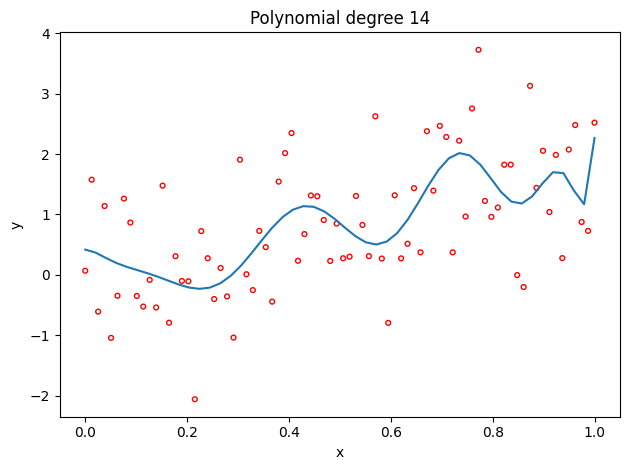

In [20]:
start_train = time.time()
polynomial_regression(x=X, y=y, degree=14, lmda=0)
end_train = time.time()

In [21]:
print("**-------------Result-------------**")
print('     Execution time : %f s' % (end_train - start_train))
print("**--------------------------------**")

**-------------Result-------------**
     Execution time : 0.283175 s
**--------------------------------**


**--------Fold 1 Result----------**
Degree=14, RMSE=0.5564077006034284


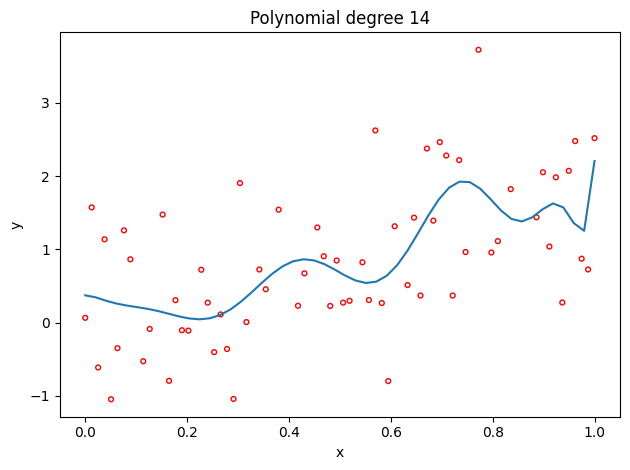

Degree=14, RMSE=0.4049860178292526


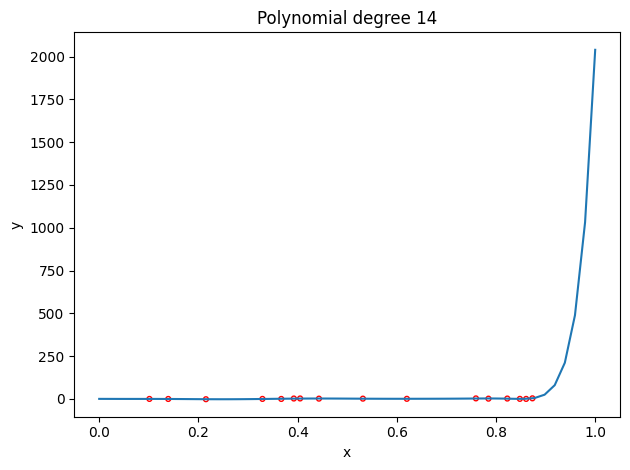

**--------------------------------**

**--------Fold 2 Result----------**
Degree=14, RMSE=0.5635156864402677


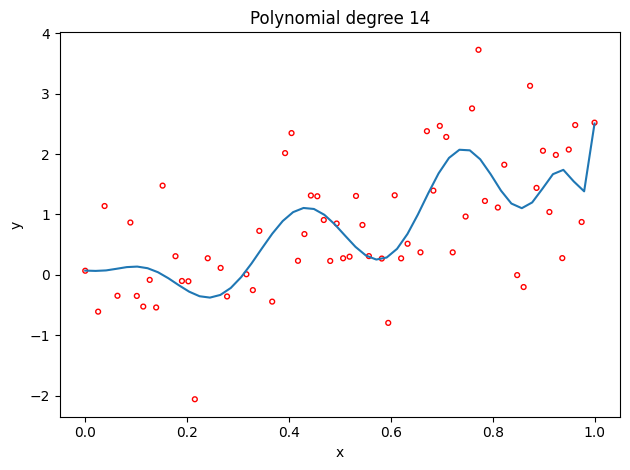

Degree=14, RMSE=0.5429904626725348


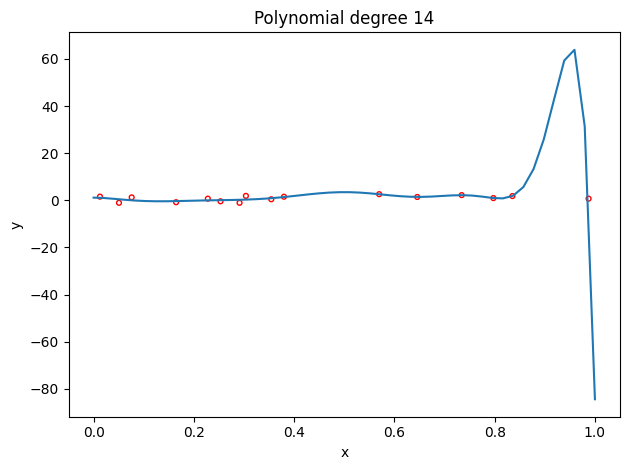

**--------------------------------**

**--------Fold 3 Result----------**
Degree=14, RMSE=0.6086522722471598


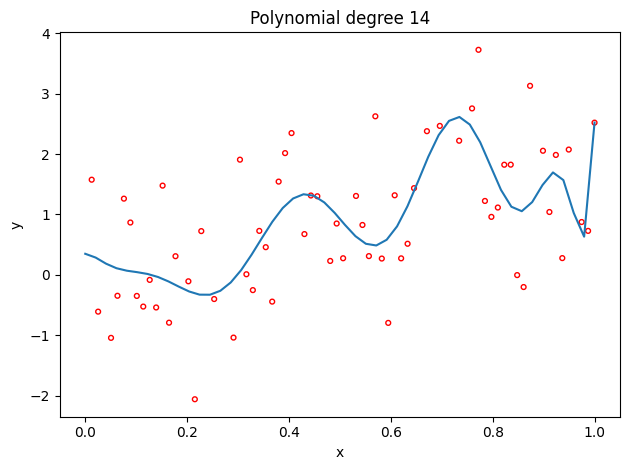

Degree=14, RMSE=0.27969634525678305


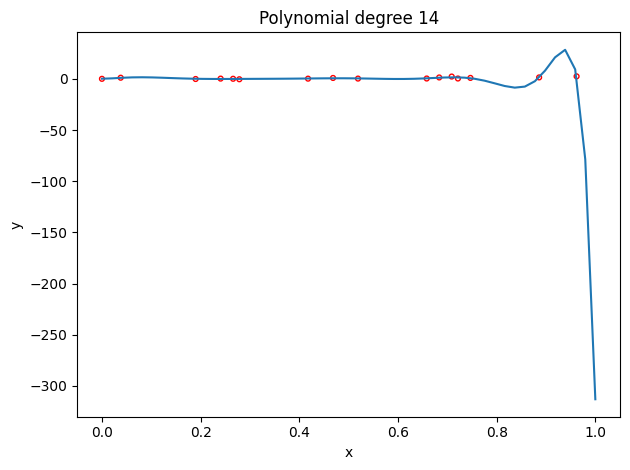

**--------------------------------**

**--------Fold 4 Result----------**
Degree=14, RMSE=0.6242343024602014


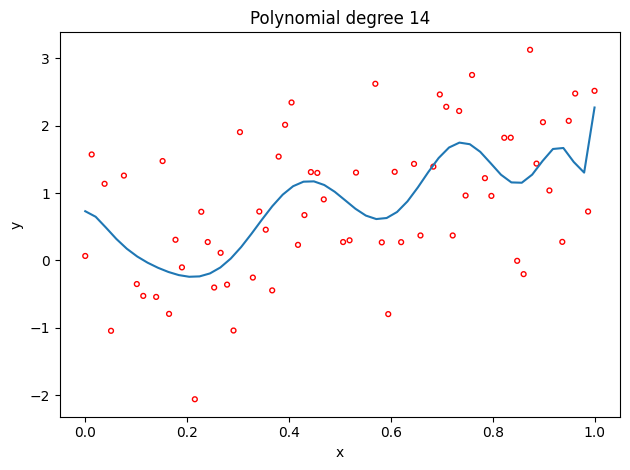

Degree=14, RMSE=0.19944101500931297


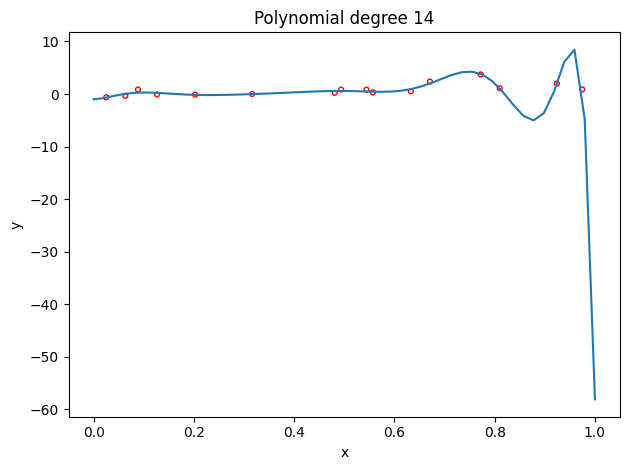

**--------------------------------**

**--------Fold 5 Result----------**
Degree=14, RMSE=0.6044016013111257


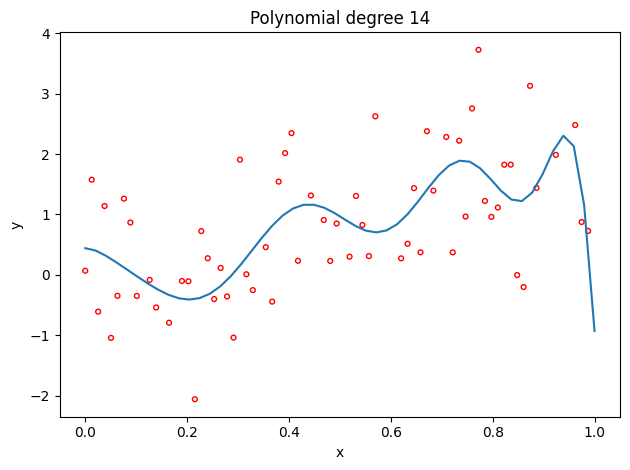

Degree=14, RMSE=0.2927615502396007


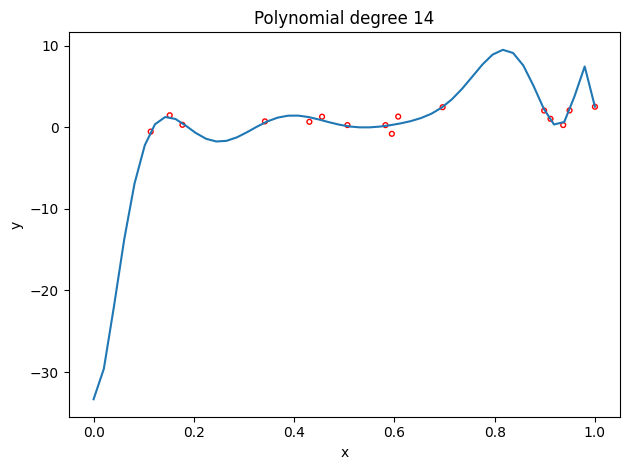

**--------------------------------**



In [22]:
kfold = KFold(n_splits=5, shuffle=True, random_state=None)
idx = 1

for train_idx, test_idx in kfold.split(X):
    x_train, x_test = X[train_idx], X[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]
    print("**--------Fold {} Result----------**" .format(idx))
    polynomial_regression(x=x_train, y=y_train, degree=14, lmda=0)
    polynomial_regression(x=x_test, y=y_test, degree=14, lmda=0)
    print("**--------------------------------**\n")
    idx = idx + 1

In [23]:
X_sin = np.linspace(0, 1, num_point)  
noise = np.random.normal(0, 0.04, num_point)
y_sin = np.sin(2 * np.pi * X_sin) + noise

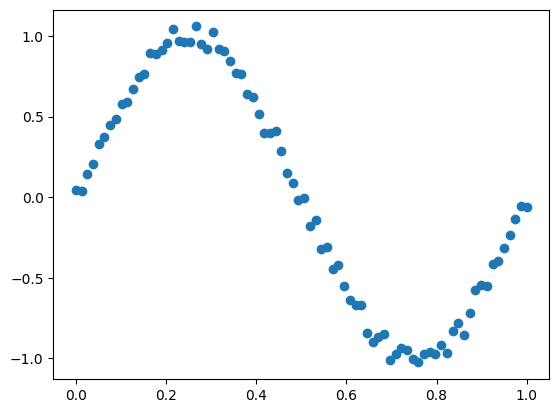

In [24]:
plt.scatter(X_sin, y_sin)

Degree=14, RMSE=0.028887097190201494


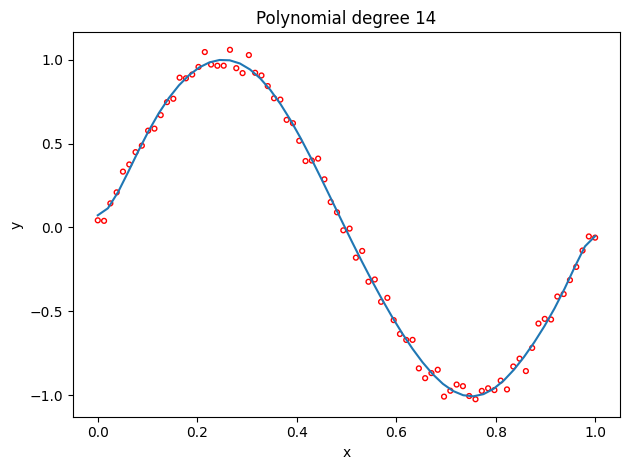

In [25]:
polynomial_regression(x=X_sin, y=y_sin, degree=14, lmda=0) 

**--------Fold 1 Result----------**
Degree=14, RMSE=0.027374141048660316


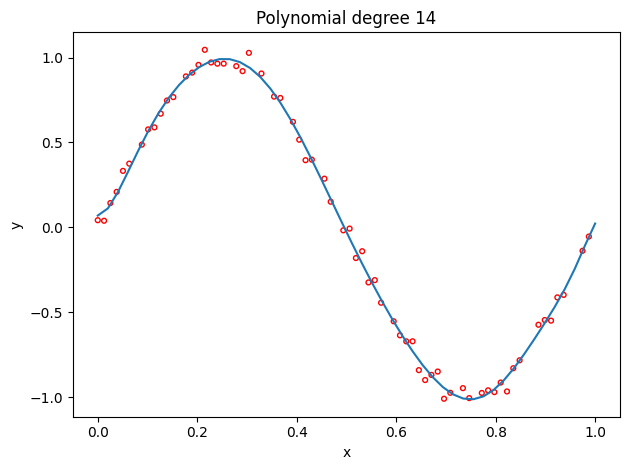

Degree=14, RMSE=0.01771066867462375


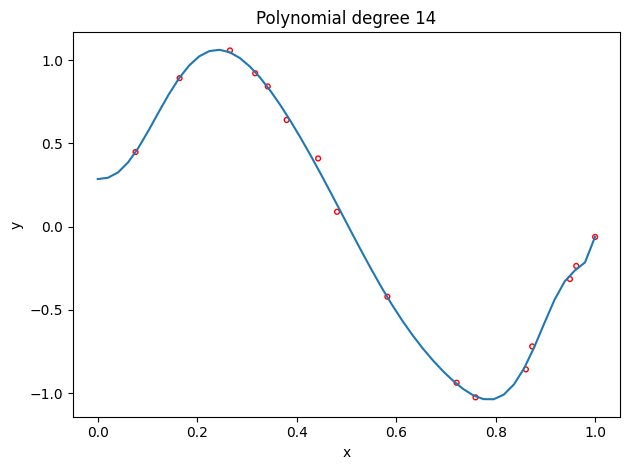

**--------------------------------**

**--------Fold 2 Result----------**
Degree=14, RMSE=0.02822626236667774


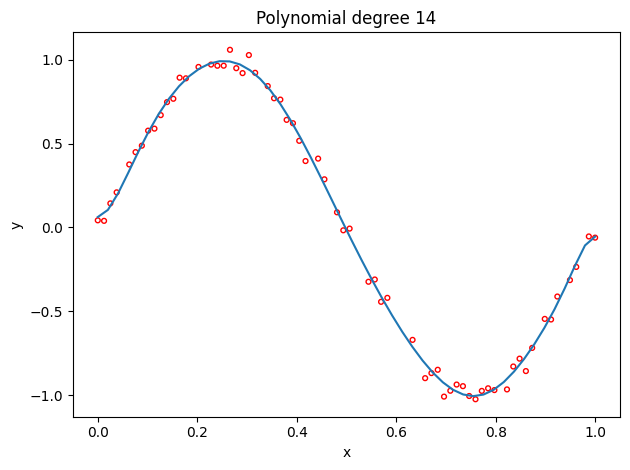

Degree=14, RMSE=0.0162729834785817


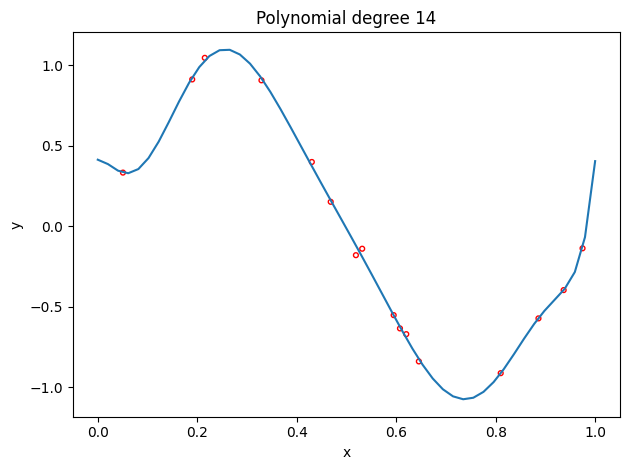

**--------------------------------**

**--------Fold 3 Result----------**
Degree=14, RMSE=0.02873690379912878


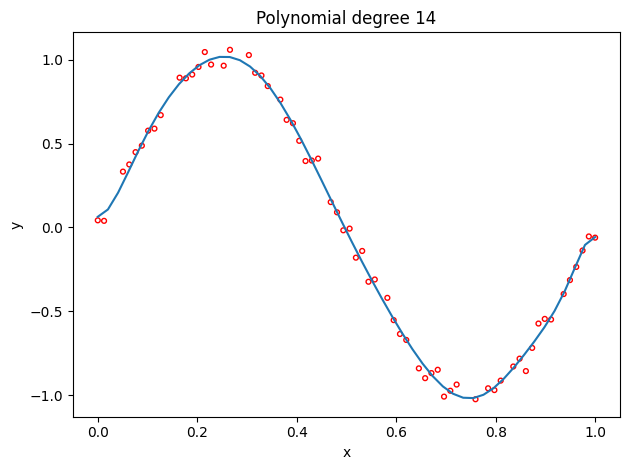

Degree=14, RMSE=0.009838102510673859


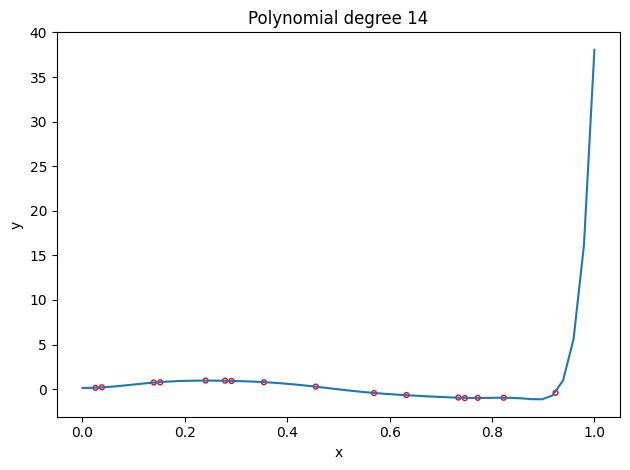

**--------------------------------**

**--------Fold 4 Result----------**
Degree=14, RMSE=0.028903071572375698


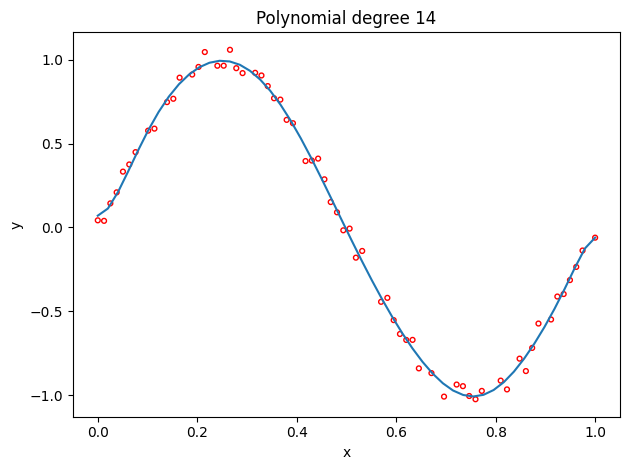

Degree=14, RMSE=0.02254432455853114


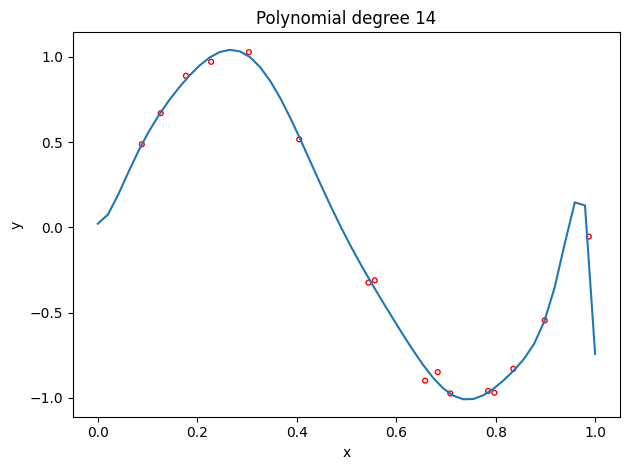

**--------------------------------**

**--------Fold 5 Result----------**
Degree=14, RMSE=0.02826525293673406


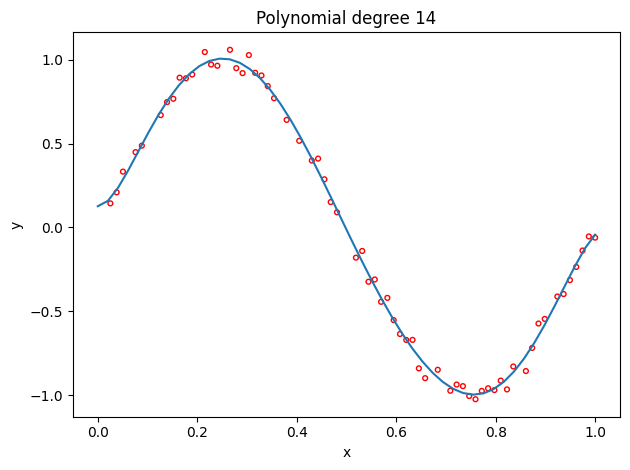

Degree=14, RMSE=0.017961554547374737


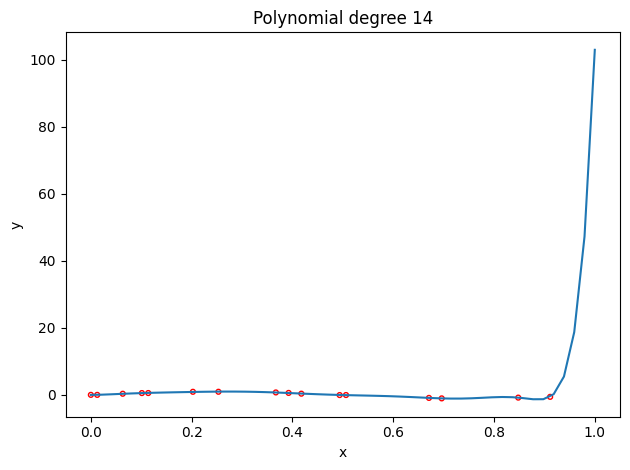

**--------------------------------**



In [26]:
kfold = KFold(n_splits=5, shuffle=True, random_state=None)
idx = 1

for train_idx, test_idx in kfold.split(X_sin):
    x_train, x_test = X_sin[train_idx], X_sin[test_idx]
    y_train, y_test = y_sin[train_idx], y_sin[test_idx]
    print("**--------Fold {} Result----------**" .format(idx))
    polynomial_regression(x=x_train, y=y_train, degree=14, lmda=0)
    polynomial_regression(x=x_test, y=y_test, degree=14, lmda=0)
    print("**--------------------------------**\n")
    idx = idx + 1